# Description of the Problem

Your Company is aiming to minimize production costs of some goods. During the production process, an essential product P is used, which can be supplied from one of two partners - supplier A and supplier B. Your consultants requested the historical prices of product P from both suppliers A and B, which were provided as monthly averages for the period from February 2018 to March 2020.

Preparing Company Budget for the coming twelve months period, your plan is to purchase the same amount of product P monthly. There were some periods in the past, when it would be more profitable to use supplier A (the prices of product P were lower), and other periods to work with supplier B. For the Budget model you can set some percentage of the goods to be purchased from supplier A (e.g. 60%) and the remaining part from supplier B (e.g. 40%), but this split should be kept consistent for the whole of the twelve months period.
Based on the historical prices, is there a particular percentage which will be more profitable to supply from Company A, and the remaining part from Company B? Or maybe it does not matter and you can work just with one of the suppliers?

<a name='1.1'></a>
### 1.1 - Mathematical Statement of the Problem
Denoting prices of the product P from Company A and Company B as $p_A$ (USD) and $p_B$ (USD) respectively, and the volume of the product to be supplied per month as $n$ (units), the total cost in USD is:

$$f\left(\omega\right) = p_A \omega \,n+ p_B \left(1 - \omega\right) n,$$

$f(\omega)$ is cost function where $0\leq\omega\leq1$ is the parameter. If $\omega = 1$, all goods will be supplied from Company A, and if $\omega = 0$, from Company B. In case of $0<\omega<1$, some percentage will be allocated to both. 
As it is planned to keep the volume $n$ constant over the next twelve months, in the mathematical model the common approach is to put $n = 1$.

$$f\left(\omega\right) = p_A \omega+ p_B \left(1 - \omega\right) \tag{1}$$

$$\mathcal{L}\left(\omega\right) = \frac{1}{k}\sum_{i=1}^{k}\left(f^i \left(\omega\right) -  \overline{f\left (\omega\right)}\right)^2\tag{2}$$

$\mathcal{L}\left(\omega\right)$ is called a variance of $\{f^1 \left(\omega\right), \cdots , f^k \left(\omega\right)\}$ or cost function
The aim is to minimize the variance $\mathcal{L}\left(\omega\right)$, where $\omega\in\left[0, 1\right]$.
By minimizing $\mathcal{L}(\omega)$, you can find the optimal value of 𝜔 that results in the most stable cost over time, which might be desirable for budgeting and contract negotiations.

In [1]:
# A function to perform automatic differentiation.
from jax import grad
# A wrapped version of NumPy to use JAX primitives.
import jax.numpy as np
# A library for programmatic plot generation.
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd

### Open and Analyze the Dataset
Historical prices for both suppliers A and B are saved in the file `data/prices.csv`. 

In [2]:
df = pd.read_csv('data/prices.csv')
print(df.shape)

(50, 3)


In [3]:
print(df.columns)

Index(['date', 'price_supplier_a_dollars_per_item',
       'price_supplier_b_dollars_per_item'],
      dtype='object')


In [4]:
df.head()

,date,price_supplier_a_dollars_per_item,price_supplier_b_dollars_per_item
0,1/02/2016,104,76
1,1/03/2016,108,76
2,1/04/2016,101,84
3,1/05/2016,104,79
4,1/06/2016,102,81


Store columns in numpy array

In [5]:
prices_A = df['price_supplier_a_dollars_per_item']
prices_B = df['price_supplier_b_dollars_per_item']
print(prices_A.dtype)

prices_A = np.array(prices_A, dtype=np.float32)
prices_B = np.array(prices_B, dtype=np.float32)

int64


In [6]:
print("Some prices of supplier A:", prices_A[0:5])
print("Some prices of supplier B:", prices_B[0:5])

Some prices of supplier A: [104. 108. 101. 104. 102.]
Some prices of supplier B: [76. 76. 84. 79. 81.]


In [19]:
print("Average of the prices, supplier A:", np.mean(prices_A))
print("Average of the prices, supplier B:", np.mean(prices_B))

Average of the prices, supplier A: 100.799995
Average of the prices, supplier B: 100.0


Average prices are almost similar

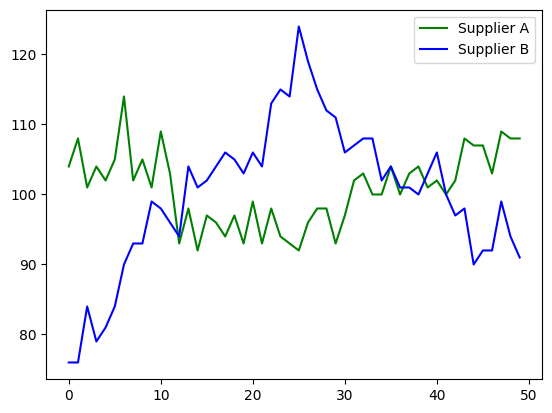

In [7]:
# plottinh graphs
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
plt.plot(prices_A, c='g', label="Supplier A")
plt.plot(prices_B, c='b', label="Supplier B")
plt.legend()

plt.show()

### Construct the Function $\mathcal{L}$ to Optimize and Find its Minimum Point

Calculate `f_of_omega`, corresponding to the $f^i\left(\omega\right)=p_A^i \omega+ p_B^i \left(1 - \omega\right)$. Prices $\{p_A^1, \cdots, p_A^k\}$ and $\{p_B^1, \cdots, p_B^k\}$ are saved in the arrays `prices_A` and `prices_B`.

In [10]:
def f_omega(omega):
    res = prices_A * omega + prices_B * (1 - omega)
    return res

def L_omega(omega):
    mean = np.mean(f_omega(omega))
    return np.sum((f_omega(omega) - mean)**2) / prices_A.size

In [11]:
print("L(omega = 0) = ", L_omega(0)) 
print("L(omega = 0.2) = ", L_omega(0.2)) 
print("L(omega = 0.5) = ", L_omega(0.5)) 
print("L(omega = 0.8) = ", L_omega(0.8)) 
print("L(omega = 1) = ", L_omega(1)) 

L(omega = 0) =  110.72
L(omega = 0.2) =  61.156807
L(omega = 0.5) =  17.67
L(omega = 0.8) =  11.212798
L(omega = 1) =  27.48


In [29]:
N = 1001
omega_array = np.linspace(0, 1, N)
def L_omega_array(omega_array):
    L_omega_array = np.zeros(N)
    for i in range(0, N):
        ans = L_omega(omega_array[i])
        L_omega_array = L_omega_array.at[i].set(ans)
    return L_omega_array

L_array = L_omega_array(omega_array)

In [30]:
print("L(omega = 0) = ", L_array[0])
print("L(omega = 1) = ", L_array[N - 1]) 

L(omega = 0) =  110.72
L(omega = 1) =  27.48


In [33]:
L_min_index = L_array.argmin()
opt_L = L_array[L_min_index]
opt_omega_1 = omega_array[L_min_index]

print(f"Omega_min = {opt_omega_1}\nL_min = {opt_L}")

Omega_min = 0.7020000219345093
L_min = 9.249719619750977


In [36]:
def dLdOmega_of_omega_array(omega_array):
    dLdOmega_array = np.zeros(N)
    for i in range(0, N):
        g = grad(L_omega)(omega_array[i])
        dLdOmega_array = dLdOmega_array.at[i].set(g)
    return dLdOmega_array

dLdOmega_array = dLdOmega_of_omega_array(omega_array)

In [38]:
dLdOmega_min_index = np.abs(dLdOmega_array).argmin()
opt_dLdOmega = dLdOmega_array[dLdOmega_min_index]
opt_omega_2 = omega_array[dLdOmega_min_index]

print(f"Omega_min = {opt_omega_2}\ndLdOmega_min = {opt_dLdOmega}")

Omega_min = 0.7020000219345093
dLdOmega_min = -0.1290912628173828


The result is the same: $\omega = 0.702$. Let's plot $\mathcal{L}\left(\omega\right)$ and $\frac{d\mathcal{L}}{d\omega}$ to visualize the graphs of them, minimum point of the function $\mathcal{L}\left(\omega\right)$ and the point where its derivative is around $0$: